In [295]:
import numpy as np
from matplotlib import pyplot as plt
print('Hello I switched to Python 3 from Python 2')
print('Learn Python math by working on some calculations related to a magnetic crawler')

Hello I switched to Python 3 from Python 2
Learn Python math by working on some calculations related to a magnetic crawler


In [296]:
print('Things to pay attention to: How functions are defined. Whether you can import numpy and matplotlib.')
print('And, how to do a calculation on an array. It is a little different from MATLAB')
print('Dont get distracted by details of magnetic units etc') #unless you are in 473

Things to pay attention to: How functions are defined. Whether you can import numpy and matplotlib.
And, how to do a calculation on an array. It is a little different from MATLAB
Dont get distracted by details of magnetic units etc


In [297]:
I=2 #Current in amps where wire temp is <200C. 

#34-gauge magnet wire can stay below 200 C if it carries a max current of 2A 
#There isn't a simple formula for it but there are plenty of charts available
#Later, for different wire radius, I can interpolate these max currents from the chart.


r=160e-6/2 #Magnet wire radius in meters. 34-gauge magnet wire is 160 micron diameter and 40 gauge is 79. I guess the 0.5 mil insulation would add 25 micron but I will ignore

Br = 1.3200 #residual magnetic flux density for N42 grade NdFeB in tesla (1T = 10000 Gausss, usually Br is given as 13200 Gauss) 
#https://www.kjmagnetics.com/blog.asp?p=magnet-grade


#Other notes: NdFeB curie temp is 310 C. Typical NdFeB grade N temp is sub 80 C- don't let it touch the hot wire very long! N52 grade is even worse, should be kept less than 60 c
#Working above 80 C won't demagnetize but the magnet won't be as strong.
#NdFeB density 7.5 grams/cc, use this for finding magnet mass

In [298]:
def SphereVol(a): #a is magnet radius in meters
    myvol = 4/3 * np.pi* a**3 #try some little experiments with order of operations
    return myvol #magnet volume in cubic meters

def NdFeBmass(vol):#given a volume in cubic meters, return magnet mass in kg
    return vol*7500

In [299]:
def H(I,rho): #Magnetic field in A/m outside wire
    return I/(2*np.pi*rho)

def F(I,r,ayyy):  #force on magnet oriented azimuthally and treated as if the whole magnet were at rho=r+a
    return Br*SphereVol(ayyy)*I/(2*np.pi*(r+a)**2)  #as long as I am consistent I can use the variable names that were passed

In [300]:
#Check whether the magnet in danger of getting remagnetized? 
#To flip a magnet, one must apply a peak field of between 2 and 2.5 times the intrinsic coercivity.  
#For NdFeB magnets, the coercivity Hci is 750-2000 kA/m. Specificially for N42 grade NdFeB,
#KJ Magnetics gives 12 kOe. Multiply by 79.57747 to go from Oersteds (Oe) to A/m.
#That means Hci for N42 grade that I used in the experiments is 955 kA/m
#So check that the magnetic field stays below 2*955 kA/m or it will remagnetize the magnet.

Hmax=H(2,r)#Magnetic field in A/m at surface of the wire. 
#No, not even with 1 micron diameter wire even if it could carry 2 Amps which it can't even. apparently it takes a lot of windings
#to remagnetize these magnets.
Hmax, Hmax > 1910000 #Is it more than the A/m needed to remagnetize?

(3978.8735772973832, False)

In [301]:
#Array of spherical magnet radii in meters
RadiusArray=np.linspace(10e-6,75e-6, num=50)  #Start, end, and number of values you want between
#linspace generates an evenly spaced array starting at 1x10^-5 and ending at 7.5x10^-5, with 50 values by default
#or num of values you specify with the num argument
RadiusArray[0]#What if we want to see the first element in this array. RadiusArray(1) -nope error, round parentheses bad
#Use [] to get individual elements, and Python arrays start at index 0 instead of 1 like Matlab.
#RadiusArray[0:10] #Get me first 10 elements
#RadiusArray [-1] #Get me last element
#len(RadiusArray) #Gives me 50 back if I created an array w 50 elements

1e-05

In [302]:
#Array of forces holding a magnetic sphere to the surface of wire having radius r, for different magnetic sphere diameters
#Units are newtons
ForceArray=[F(2,r,eachSphereRadius) for eachSphereRadius in RadiusArray]  #This is how we can compute on an array in python
#This is an example of a "list comprehension"
ForceArray=np.array(ForceArray) #Converting it to a np array makes it act like MATLAB later

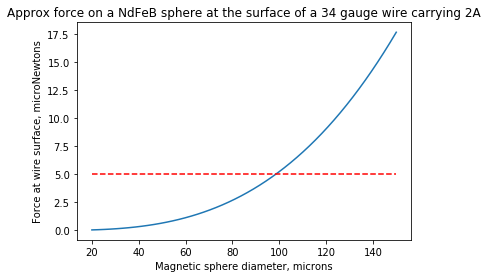

In [305]:
plt.plot(2e6*RadiusArray,1e6*ForceArray)  #This plotting syntax is exactly like Matlab because we use the matplotlib library
#Because both RadiusArray and ForceArray are Numpy arrays, you can multiply them by a scalar, 2000000 and 1000000
#is how I converted them to microns and micronewtons for a nicer looking plot
plt.xlabel('Magnetic sphere diameter, microns')
plt.ylabel('Force at wire surface, microNewtons')
plt.title('Approx force on a NdFeB sphere at the surface of a 34 gauge wire carrying 2A') #approx because I treated it as a point magnet

#Van der Waals forces for glass sphere pulling off a surface - 
#https://hal.archives-ouvertes.fr/hal-00545519/document
#These theories overpredict the adhesion force for particle diameters greater than 1 micron, because roughness reduces the actual contact area
#https://pubs.acs.org/doi/abs/10.1021/la0259196 - In this work, few-microNewton (1- to 5-) pull-off forces were measured for 
#for spheres in the 20-100 micron diameter range, with results dependent on coatings and humidity
#I'll draw a red dotted line at about 5 micronewton range indicating that below this range, one might have to worry 
#about overcoming the adhesion force between the tiny magnetic particle and the wire. solution: don't let magnet touch wire, keep it on a spring

plt.plot(2e6*np.array([RadiusArray[0],RadiusArray[-1]]), [5,5],'r--')
plt.savefig ('MagnetDownscaling.eps')





In [311]:
#Our magnet is really a 1/32 inch thick by 1/16 inch diameter cylinder in the experiments.
#Check out some things to see if the numbers match up
RealMagnetVol=0.0254/32*np.pi*(0.0254/32)**2
EffectiveRadius=(RealMagnetVol/(4/3*np.pi))**(1/3)
RealForce=F(I,r,EffectiveRadius)
#Pretend this force is acting on the magnet the whole time, how long does it take to travel 1mm
#It underestimates the travel time because the force acting on the magnet starts out small and grows to RealForce as magnet nears wre
MagMass=NdFeBmass(RealMagnetVol)
Acceleration=RealForce/MagMass
Distance=0.001 #1 millimeter
TravelUpTime=(2*Distance/Acceleration)**0.5
TravelDownTime=(2*Distance/9.8)**0.5 #how long it takes to fall 1mm
TotalTravelTime=TravelUpTime+TravelDownTime
TotalTravelTime,1/TotalTravelTime #1/TotalTravelTime is the frequency where it has the biggest amplitude


(0.0155105771317798, 64.47213353209717)

In [306]:
NewArray=[3,4,5] #Python native array acts different than Numpy array

In [308]:
np.array(NewArray)*3

array([ 9, 12, 15])